## **Step 1:** make sure that fastai and duckduckgo_search are up to date

In [1]:
#A shell command used to install fastai and duckduckgo_search libraries through pip. 
#The -U flag tells pip to upgrade any existing packages to the latest version
#The -qq flag means "quiet mode"
!pip install -Uqq fastai duckduckgo_search

## **Step 2:** Download images of cars, motorcycles, and boats

In [2]:
#Here we are defining a function 'search_imgs' that returns images from the ddg_images
#search. We are providing it with the search term and the maximum number of images per
#search (default value is 20)
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_imgs(term, max_images=30):
    print(f"Searching for `{term}`")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

Searching for `car photos`
Searching for `motorcycle photos`
Searching for `boat photos`
Searching for `plane photos`


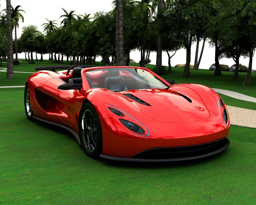

In [3]:
#Let's download few images and display them here to see if we get reasonnable results
#from the search
from fastdownload import download_url
from fastai.vision.all import *  #Image class
from time import sleep

terms = ["car", "motorcycle", "boat", "plane"]

for term in terms:
    urls = search_imgs(term + " photos", max_images=1)
    download_url(urls[0], term + ".jpg", show_progress=False)

Image.open("car.jpg").to_thumb(256,256)

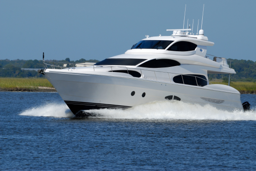

In [4]:
Image.open("boat.jpg").to_thumb(256,256)

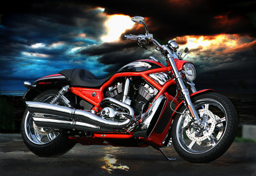

In [5]:
Image.open("motorcycle.jpg").to_thumb(256,256)

The search results look reasonnable. Let's pull few examples of each group and save them under different folders.

In [6]:
path = Path('machine_type')
from time import sleep

for term in terms:
    dest = (path/term)
    dest.mkdir(exist_ok = True, parents=True)
    download_images(dest, urls=search_imgs(f'{term} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_imgs(f'{term} sideview photo'))
    sleep(10)
    download_images(dest, urls=search_imgs(f'{term} 2023 photo'))
    sleep(10)
    resize_images(path/term, max_size=400, dest=path/term)

Searching for `car photo`
Searching for `car sideview photo`
Searching for `car 2023 photo`
Searching for `motorcycle photo`
Searching for `motorcycle sideview photo`
Searching for `motorcycle 2023 photo`
Searching for `boat photo`
Searching for `boat sideview photo`
Searching for `boat 2023 photo`
Searching for `plane photo`
Searching for `plane sideview photo`
Searching for `plane 2023 photo`


We make sure that all photos that failed to download correctly are removed before proceeding to the next step

In [7]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

6

## **Step 3:** Train our model

`Dataloaders` are objects that contain **training sets** (images used to create a model) and **validation sets** (images used to check the accuracy of the created model). In fastai, it can be done with a **DataBlock**

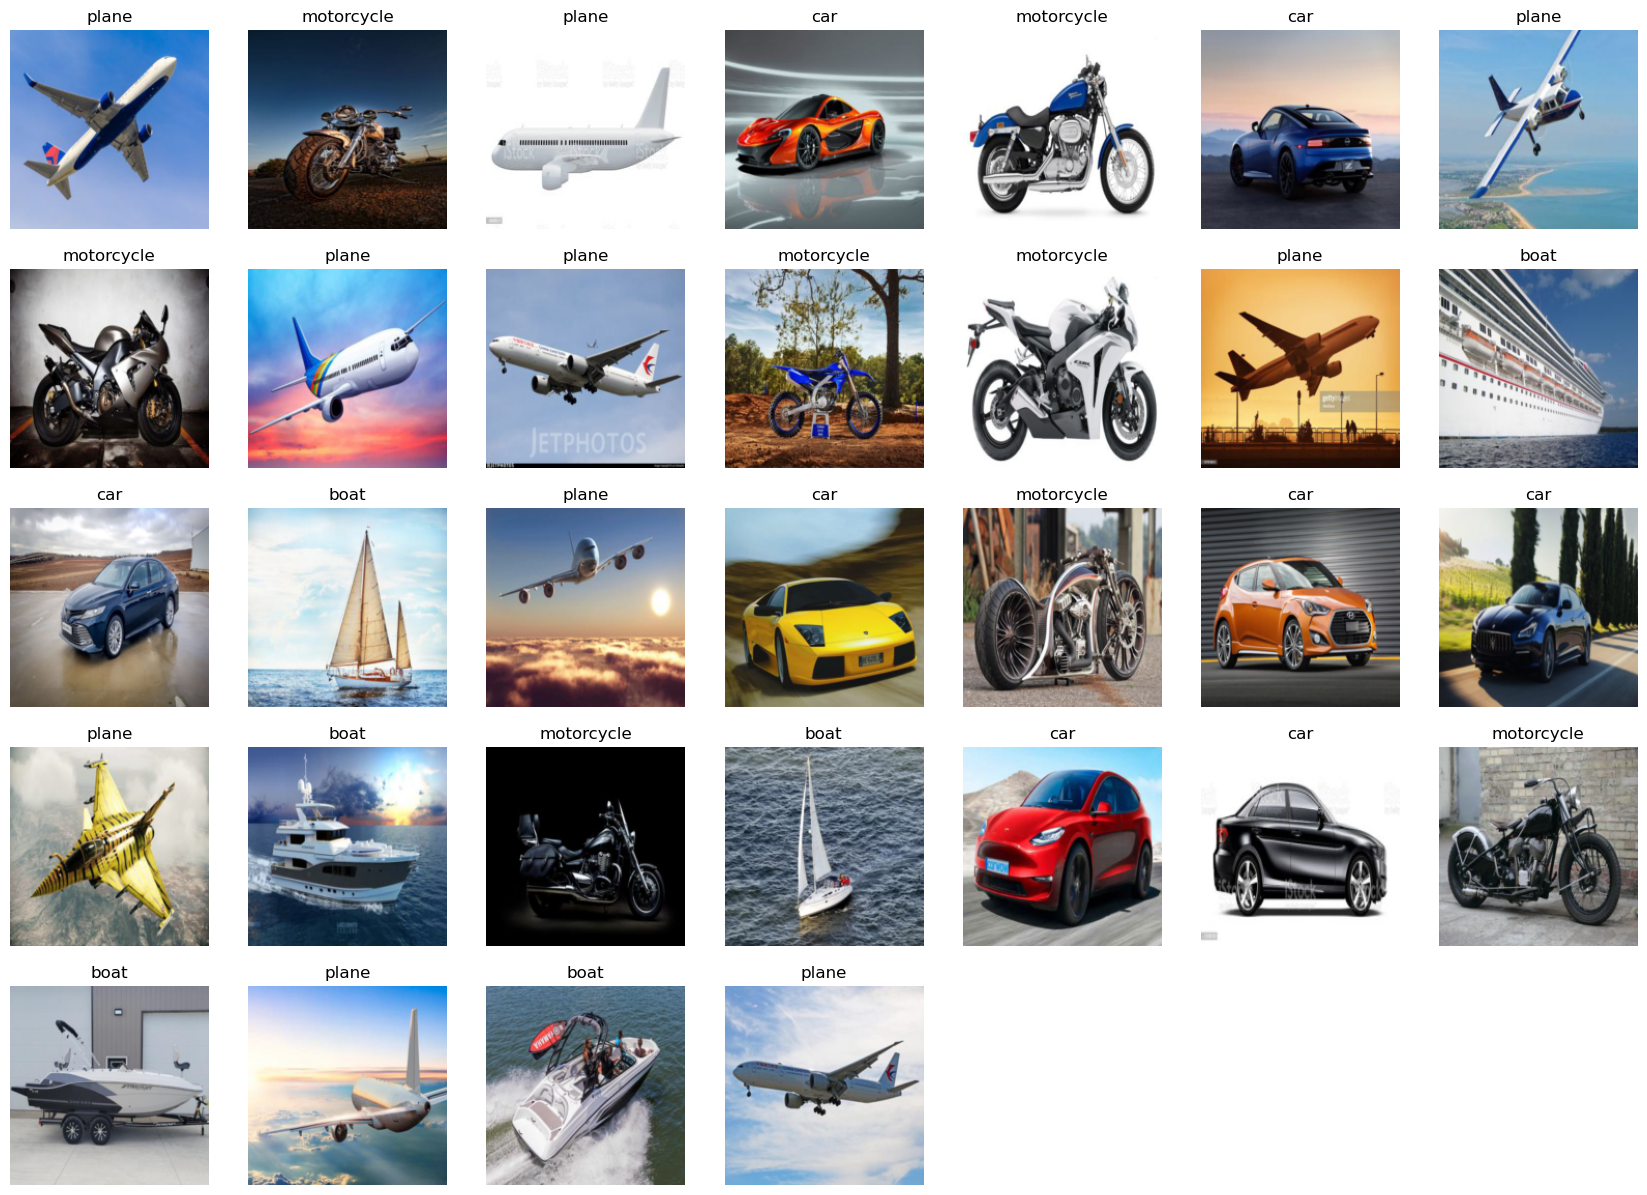

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=100)

## Step 4: Try the model